In [ ]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras
import math
import numpy as np

print(tf.__version__)

1.9.0


In [2]:
%matplotlib inline

In [28]:
x = np.arange(-np.pi, np.pi,0.1)

In [29]:
import pandas as pd
df = pd.DataFrame(x)
df.head()

,0
0,-3.141593
1,-3.041593
2,-2.941593
3,-2.841593
4,-2.741593


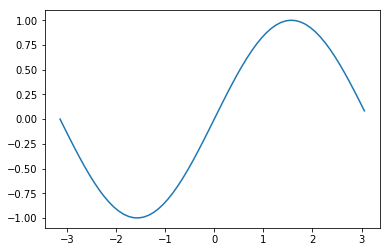

In [30]:
import matplotlib.pyplot as plt
plt.plot(x, np.sin(x))

Training set: (63, 1)
Testing set:  (63, 1)


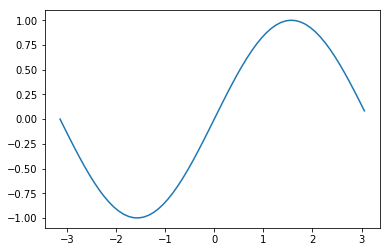

In [43]:
train_data = x.reshape(-1, 1)
train_labels = np.sin(x).reshape(-1, 1)
m = train_data.shape[0]
plt.plot(train_data, train_labels)

print("Training set: {}".format(train_data.shape))  # 404 examples, 13 features
print("Testing set:  {}".format(train_labels.shape))

Testing set:  (63, 1)


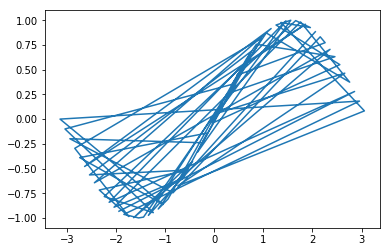

In [42]:
# Shuffle the training set
permutation = list(np.random.permutation(m))
train_data = train_data[permutation]
train_labels = train_labels[permutation]
plt.plot(train_data, train_labels)
print("Testing set:  {}".format(train_labels.shape))

In [34]:
def build_model(network_layers= [64,64,1]):
  model = keras.Sequential([
    keras.layers.Dense(network_layers[0], activation=tf.nn.relu,
                       input_shape=(train_data.shape[1],)),
    keras.layers.Dense(network_layers[1], activation=tf.nn.relu),
    keras.layers.Dense(network_layers[2])
  ])

  optimizer = tf.train.RMSPropOptimizer(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
  return model

model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 4,353
Trainable params: 4,353
Non-trainable params: 0
_________________________________________________________________


In [44]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 500



In [36]:
# Store training stats
history = model.fit(train_data, train_labels, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

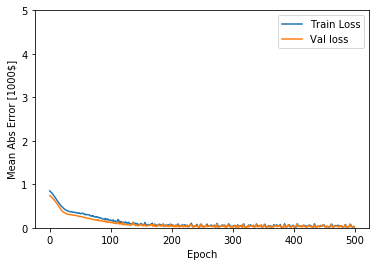

In [37]:
import matplotlib.pyplot as plt


def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [1000$]')
    plt.plot(history.epoch, np.array(history.history['mean_absolute_error']),
           label='Train Loss')
    plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
           label = 'Val loss')
    plt.legend()
    plt.ylim([0, 5])
    plt.show()


plot_history(history)

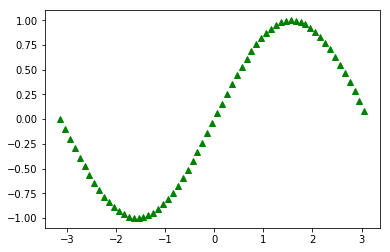

In [45]:
test_predictions = model.predict(train_data).flatten()

plt.plot(train_data, train_labels,'g^')
#plt.plot(train_data, test_predictions)

In [ ]:
model = build_model([128, 64, 1])
model.summary()

In [44]:
# Store training stats
history = model.fit(train_data, train_labels, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

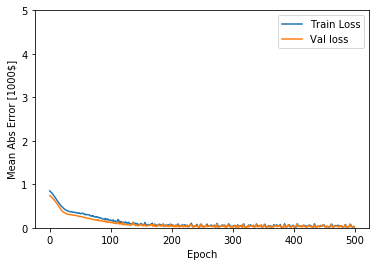

In [46]:
plot_history(history)

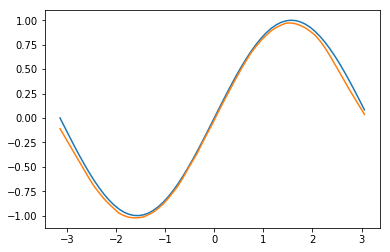

In [47]:
test_predictions = model.predict(train_data).flatten()

plt.plot(train_data, train_labels)
plt.plot(train_data, test_predictions)

# Save the weights

In [48]:
model.save_weights('./checkpoints/my_checkpoint')

# Restore the weights

In [49]:
model = build_model([128, 64, 1])
model.load_weights('./checkpoints/my_checkpoint')
model.summary()
loss,acc = model.evaluate(train_data, train_labels)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 128)               256       
_________________________________________________________________
dense_13 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 65        
Total params: 8,577
Trainable params: 8,577
Non-trainable params: 0
_________________________________________________________________
63/63 [==============================] - 0s 579us/step
Restored model, accuracy:  3.91%


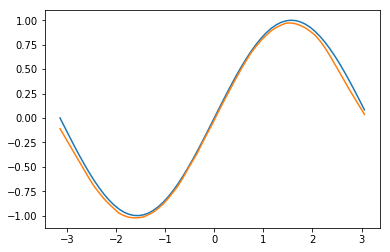

In [50]:
test_predictions = model.predict(train_data).flatten()

plt.plot(train_data, train_labels)
plt.plot(train_data, test_predictions)